# Team Score Prediction

- `import numpy as np`: Numerical computations library.
- `import pandas as pd`: Data manipulation and analysis library.
- `import os`: Interaction with the operating system.
- `import seaborn as sns`: Statistical data visualization library.
- `from datetime import datetime`: Date and time manipulation.
- `from sklearn.preprocessing import LabelEncoder`: Encoding categorical variables.
- `from sklearn.linear_model import LinearRegression, LogisticRegression`: Linear and logistic regression models.
- `from sklearn.metrics import ...`: Evaluation metrics (accuracy, confusion matrix, precision, recall, etc.).
- `from sklearn.pipeline import Pipeline`: Data processing pipeline.
- `import matplotlib.pyplot as plt`: Data visualization.
- `from sklearn.model_selection import GridSearchCV`: Hyperparameter tuning using grid search.
- `from sklearn.preprocessing import StandardScaler, MinMaxScaler`: Feature scaling.
- `from sklearn.ensemble import RandomForestRegressor`: Random Forest Regressor model.
- `from sklearn.tree import DecisionTreeRegressor`: Decision Tree Regressor model.
- `from sklearn.linear_model import Ridge, Lasso`: Ridge and Lasso regression models.
- `from keras.losses import mean_squared_error`: Loss function for Keras.
- `import tensorflow as tf`: TensorFlow library for machine learning.
- `from tensorflow import keras`: High-level neural networks API.
- `import pickle`: Serialization and deserialization of Python objects.
- `import requests`: Making HTTP requests.
- `from bs4 import BeautifulSoup`: Web scraping library.
- `from sklearn.compose import ColumnTransformer`: Transforming columns in a dataset.
- `from sklearn.preprocessing import OneHotEncoder`: One-hot encoding categorical features.
- `from tensorflow.keras.models import Sequential`: Building sequential models in Keras.
- `from tensorflow.keras.layers import LSTM, Dense`: LSTM and Dense layers for neural networks.
- `import warnings`: Handling warnings.
- `warnings.filterwarnings("ignore")`: Suppressing warnings.


In [149]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from keras.losses import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
import requests
from bs4 import BeautifulSoup
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")

In [150]:
np.random.seed(0)

In [151]:
pd.set_option('display.max_columns', None)

This dataset is sourced from Kaggle and is titled "ICC Men's World Cup 2023 Dataset." It contains a file named 'deliveries.csv,' which comprises data detailing each ball bowled in all matches played during this World Cup. I have utilized this dataset to predict the score a team is likely to achieve while batting.

In [152]:
ball=pd.read_csv("/kaggle/input/icc-mens-world-cup-2023/deliveries.csv")

In [153]:
ball

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **Filtering Rows with Non-null 'penalty':**
  Filters the DataFrame `ball` to display rows where the 'penalty' column is not null. This operation identifies and shows rows containing data related to penalties.

- **Unique Values in 'season' Column:**
  Retrieves the unique values present in the 'season' column of the DataFrame `ball`. It returns a list of distinct season values in the dataset.

- **Unique Dates in 'start_date' Column:**
  Displays the unique dates found in the 'start_date' column of the DataFrame `ball`. This operation shows a list of distinct dates present in the dataset.

- **Unique Values in 'wides' Column:**
  Lists the unique values present in the 'wides' column of the DataFrame `ball`. It shows different types or categories of wides in the dataset.

- **Fill Missing Values with Zeros:**
  Fills missing values with zeros in specific columns ('wides', 'noballs', 'byes', 'legbyes') of the DataFrame `ball`. This ensures these columns contain numerical data and replaces any missing values with zeros.

- **Unique Values in 'wicket_type' Column:**
  Retrieves the unique values found in the 'wicket_type' column of the DataFrame `ball`. This operation displays various types of dismissals or wicket events that occurred during matches.


In [154]:
ball[ball['penalty'].notnull()]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
9530,19,2023/24,2023-10-21,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,1,42.2,Netherlands,Sri Lanka,SA Engelbrecht,LV van Beek,C Karunaratne,0,5,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [155]:
ball['season'].unique()

array(['2023/24'], dtype=object)

In [156]:
ball['start_date'].unique()

array(['2023-10-05', '2023-10-06', '2023-10-07', '2023-10-08',
       '2023-10-09', '2023-10-10', '2023-10-11', '2023-10-13',
       '2023-10-14', '2023-10-15', '2023-10-16', '2023-10-17',
       '2023-10-18', '2023-10-19', '2023-10-20', '2023-10-21',
       '2023-10-22', '2023-10-23', '2023-10-12', '2023-10-24',
       '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28',
       '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-01'],
      dtype=object)

In [157]:
ball['wides'].unique()

array([nan,  1.,  3.,  5.,  2.])

In [158]:
ball[['wides','noballs','byes' ,'legbyes']]=ball[['wides','noballs','byes' ,'legbyes']].fillna(0)

In [159]:
ball

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [160]:
ball['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'caught and bowled', 'lbw', 'run out',
       'stumped', 'retired hurt'], dtype=object)

- **Creating a New Column 'wicket':**
  The code snippet adds a new column 'wicket' to the DataFrame `ball`. It utilizes the 'wicket_type' column to determine whether a wicket occurred during a specific event. 

- **Lambda Function Application:**
  Using the `apply()` function in combination with a lambda function, it checks each value in the 'wicket_type' column. If the value is not a null value (`pd.isna(x)` checks for NaN values), it assigns the value 1 to the 'wicket' column. Otherwise, it assigns the value 0.

In [161]:
ball['wicket'] = ball['wicket_type'].apply(lambda x: 1 if not pd.isna(x) else 0)

In [162]:
ball

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,wicket
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0


In [163]:
ball.drop(['penalty' , 'wicket_type' , 'player_dismissed' , 'other_wicket_type' , 'other_player_dismissed','season'], axis=1, inplace=True)

- **Grouping Data and Calculating Sums:**
  - `result = ball.groupby(['match_id', 'innings'])[['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes']].sum()`
    - Groups the data in `ball` by 'match_id' and 'innings'.
    - Calculates the sum of numerical columns 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes' for each group.
    - Stores the aggregated results in the DataFrame `result`.

- **Resetting Index:**
  - `result = result.reset_index()`
    - Resets the index of the DataFrame `result` after the groupby operation.

- **Dropping Unnecessary Columns:**
  - `result.drop(['noballs' , 'byes' , 'legbyes','wides'], axis=1, inplace=True)`
    - Removes columns 'noballs', 'byes', 'legbyes', 'wides' from the DataFrame `result`.

- **Calculating Total Runs:**
  - `result['total'] = result['runs_off_bat'] + result['extras']`
    - Creates a new column 'total' in `result` containing the sum of 'runs_off_bat' and 'extras'.

- **Dropping Individual Runs Columns:**
  - `result.drop(['runs_off_bat' , 'extras'], axis=1, inplace=True)`
    - Removes columns 'runs_off_bat' and 'extras' from the DataFrame `result`.

In [164]:
result = ball.groupby(['match_id', 'innings'])[['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes']].sum()

result = result.reset_index()
result.drop(['noballs' , 'byes' , 'legbyes','wides'], axis=1, inplace=True)
result['total'] = result['runs_off_bat'] + result['extras']
result.drop(['runs_off_bat' , 'extras'], axis=1, inplace=True)
result.head(10)

,match_id,innings,total
0,1,1,282
1,1,2,283
2,2,1,286
3,2,2,205
4,3,1,156
5,3,2,158
6,4,1,428
7,4,2,326
8,5,1,199
9,5,2,201


- Merges the DataFrame `ball` with the DataFrame `result` based on the common columns 'match_id' and 'innings'.
- Adds columns from the `result` DataFrame to the `ball` DataFrame based on matching values in 'match_id' and 'innings'.

In [165]:
ball = ball.merge(result, on=['match_id', 'innings'])
ball

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket,total
0,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0.0,0.0,0.0,0.0,0,282
1,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0.0,0.0,0.0,0.0,0,282
2,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0.0,0.0,0.0,0.0,0,282
3,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0.0,0.0,0.0,0.0,0,282
4,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0.0,0.0,0.0,0.0,0,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0.0,0.0,0.0,0.0,0,167
17376,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0.0,0.0,0.0,0.0,0,167
17377,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,0.0,0.0,0.0,0.0,0,167
17378,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,0.0,0.0,0.0,0.0,0,167


- **Dropping Specific Columns:**
  - `ball.drop(['noballs', 'byes', 'legbyes', 'wides'], axis=1, inplace=True)`
    - Removes columns 'noballs', 'byes', 'legbyes', and 'wides' from the DataFrame `ball`.

- **Calculating Cumulative Runs and Wickets per Match and Inning:**
  - `ball['cumulative_runs'] = ball.groupby(['match_id', 'innings'])['runs_off_bat'].cumsum() + ball.groupby(['match_id', 'innings'])['extras'].cumsum()`
    - Computes the cumulative sum of 'runs_off_bat' and 'extras' columns within each group defined by 'match_id' and 'innings', storing the result in the 'cumulative_runs' column.
  - `ball['wickets'] = ball.groupby(['match_id', 'innings'])['wicket'].cumsum()`
    - Calculates the cumulative sum of 'wicket' column within each group defined by 'match_id' and 'innings', storing the result in the 'wickets' column.

- **Dropping Additional Columns:**
  - `ball.drop(['striker', 'non_striker', 'bowler', 'match_id', 'runs_off_bat', 'extras', 'innings', 'wicket', 'start_date'], axis=1, inplace=True)`
    - Removes columns 'striker', 'non_striker', 'bowler', 'match_id', 'runs_off_bat', 'extras', 'innings', 'wicket', and 'start_date' from the DataFrame `ball`.

These operations modify the `ball` DataFrame by dropping specific columns and calculating cumulative runs and wickets per match and inning.

In [166]:
ball.drop(['noballs' , 'byes' , 'legbyes','wides'], axis=1, inplace=True)

In [167]:
ball['cumulative_runs'] = ball.groupby(['match_id', 'innings'])['runs_off_bat'].cumsum() + ball.groupby(['match_id', 'innings'])['extras'].cumsum()

In [168]:
ball['wickets'] = ball.groupby(['match_id', 'innings'])['wicket'].cumsum() 

In [169]:
ball

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket,total,cumulative_runs,wickets
0,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,0,282,0,0
1,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,0,282,6,0
2,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,0,282,7,0
3,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,0,282,8,0
4,1,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,0,282,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0,167,161,9
17376,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,0,167,161,9
17377,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,0,167,161,9
17378,32,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,0,167,167,9


In [170]:
ball.drop(['striker' , 'non_striker' , 'bowler','match_id','runs_off_bat','extras','innings','wicket','start_date'], axis=1, inplace=True)

In [171]:
ball

,venue,ball,batting_team,bowling_team,total,cumulative_runs,wickets
0,"Narendra Modi Stadium, Ahmedabad",0.1,England,New Zealand,282,0,0
1,"Narendra Modi Stadium, Ahmedabad",0.2,England,New Zealand,282,6,0
2,"Narendra Modi Stadium, Ahmedabad",0.3,England,New Zealand,282,7,0
3,"Narendra Modi Stadium, Ahmedabad",0.4,England,New Zealand,282,8,0
4,"Narendra Modi Stadium, Ahmedabad",0.5,England,New Zealand,282,12,0
...,...,...,...,...,...,...,...
17375,"Maharashtra Cricket Association Stadium, Pune",34.5,New Zealand,South Africa,167,161,9
17376,"Maharashtra Cricket Association Stadium, Pune",34.6,New Zealand,South Africa,167,161,9
17377,"Maharashtra Cricket Association Stadium, Pune",35.1,New Zealand,South Africa,167,161,9
17378,"Maharashtra Cricket Association Stadium, Pune",35.2,New Zealand,South Africa,167,167,9


- **Obtaining Unique Stadium Names:**
  - `stadiums = ball['venue'].unique()`
    - Retrieves unique stadium names from the 'venue' column of the DataFrame `ball`.

- **Creating a Stadium Dictionary:**
  - `stadium_dict = { stadium : i + 1 for i, stadium in enumerate(stadiums)}`
    - Generates a dictionary `stadium_dict` where each unique stadium name is assigned a numerical value (incremented by 1) based on its position in the unique stadium names list.

- **Mapping Numerical Values to Stadium Names in 'venue' Column:**
  - `ball['venue'] = ball['venue'].map(stadium_dict)`
    - Maps the numerical values from `stadium_dict` to replace stadium names in the 'venue' column of the DataFrame `ball`.

- **Encoding Categorical Columns with One-Hot Encoding:**
  - `ball = pd.get_dummies(ball, columns=['batting_team', 'bowling_team'], dtype=int)`
    - Utilizes one-hot encoding via `pd.get_dummies()` to convert categorical variables 'batting_team' and 'bowling_team' into binary encoded columns in the DataFrame `ball`.
    - The original categorical columns are replaced with their binary representations for further analysis.


In [172]:
stadiums=ball['venue'].unique()
stadium_dict = { stadium : i + 1 for i, stadium in enumerate(stadiums)}
stadium_dict

{'Narendra Modi Stadium, Ahmedabad': 1,
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 2,
 'Himachal Pradesh Cricket Association Stadium, Dharamsala': 3,
 'Arun Jaitley Stadium, Delhi': 4,
 'MA Chidambaram Stadium, Chepauk, Chennai': 5,
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 6,
 'Maharashtra Cricket Association Stadium, Pune': 7,
 'M Chinnaswamy Stadium, Bengaluru': 8,
 'Wankhede Stadium, Mumbai': 9,
 'Eden Gardens, Kolkata': 10}

In [173]:
ball['venue'] = ball['venue'].map(stadium_dict)

In [174]:
ball = pd.get_dummies(ball, columns=['batting_team', 'bowling_team'], dtype=int)

In [175]:
ball.columns

Index(['venue', 'ball', 'total', 'cumulative_runs', 'wickets',
       'batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_Netherlands', 'batting_team_New Zealand',
       'batting_team_Pakistan', 'batting_team_South Africa',
       'batting_team_Sri Lanka', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_Netherlands', 'bowling_team_New Zealand',
       'bowling_team_Pakistan', 'bowling_team_South Africa',
       'bowling_team_Sri Lanka'],
      dtype='object')

In [176]:
col=['batting_team_Afghanistan', 'batting_team_Australia',
       'batting_team_Bangladesh', 'batting_team_England', 'batting_team_India',
       'batting_team_Netherlands', 'batting_team_New Zealand',
       'batting_team_Pakistan', 'batting_team_South Africa',
       'batting_team_Sri Lanka', 'bowling_team_Afghanistan',
       'bowling_team_Australia', 'bowling_team_Bangladesh',
       'bowling_team_England', 'bowling_team_India',
       'bowling_team_Netherlands', 'bowling_team_New Zealand',
       'bowling_team_Pakistan', 'bowling_team_South Africa',
       'bowling_team_Sri Lanka','venue', 'ball',  'cumulative_runs', 'wickets','total']

In [177]:
ball=ball[col]
ball.head()

,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,batting_team_Netherlands,batting_team_New Zealand,batting_team_Pakistan,batting_team_South Africa,batting_team_Sri Lanka,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_Netherlands,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,venue,ball,cumulative_runs,wickets,total
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.1,0,0,282
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.2,6,0,282
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.3,7,0,282
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.4,8,0,282
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.5,12,0,282


- **Creating Training Set (`X_train`):**
  - `X_train = ball.drop(labels='total', axis=1)[ball['ball'] < 30]`
    - Generates the training set `X_train` by excluding the 'total' column from `ball` DataFrame where the number of overs is less than 30.

- **Creating Validation Set (`X_val`):**
  - `X_val = ball.drop(labels='total', axis=1)[(ball['ball'] >= 30) & (ball['ball'] < 40)]`
    - Produces the validation set `X_val` by excluding the 'total' column from `ball` DataFrame where the number of overs is between 30 (inclusive) and 40 (exclusive).

- **Creating Test Set (`X_test`):**
  - `X_test = ball.drop(labels='total', axis=1)[ball['ball'] >= 40]`
    - Constructs the test set `X_test` by excluding the 'total' column from `ball` DataFrame where the number of overs is 40 or more.

In [178]:
X_train = ball.drop(labels='total', axis=1)[ball['ball']< 30]
X_val = ball.drop(labels='total', axis=1)[(ball['ball']>= 30) & (ball['ball'] < 40) ]
X_test = ball.drop(labels='total', axis=1)[ball['ball']>=40 ]

In [179]:
X_train

,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,batting_team_Netherlands,batting_team_New Zealand,batting_team_Pakistan,batting_team_South Africa,batting_team_Sri Lanka,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_Netherlands,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,venue,ball,cumulative_runs,wickets
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.2,6,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.3,7,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.4,8,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.5,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17342,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,29.3,130,8
17343,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,29.4,130,8
17344,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,29.5,131,8
17345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,29.6,132,8


In [180]:
X_val

,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,batting_team_Netherlands,batting_team_New Zealand,batting_team_Pakistan,batting_team_South Africa,batting_team_Sri Lanka,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_Netherlands,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,venue,ball,cumulative_runs,wickets
183,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30.1,167,4
184,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30.2,171,4
185,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30.3,171,4
186,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30.4,171,4
187,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,30.5,171,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,34.5,161,9
17376,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,34.6,161,9
17377,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,35.1,161,9
17378,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,35.2,167,9


In [181]:
X_test

,batting_team_Afghanistan,batting_team_Australia,batting_team_Bangladesh,batting_team_England,batting_team_India,batting_team_Netherlands,batting_team_New Zealand,batting_team_Pakistan,batting_team_South Africa,batting_team_Sri Lanka,bowling_team_Afghanistan,bowling_team_Australia,bowling_team_Bangladesh,bowling_team_England,bowling_team_India,bowling_team_Netherlands,bowling_team_New Zealand,bowling_team_Pakistan,bowling_team_South Africa,bowling_team_Sri Lanka,venue,ball,cumulative_runs,wickets
243,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,40.1,225,6
244,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,40.2,226,6
245,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,40.3,227,6
246,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,40.4,227,6
247,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,40.5,228,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17159,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7,49.2,344,3
17160,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7,49.3,345,3
17161,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7,49.4,351,3
17162,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,7,49.5,351,4


- **Creating Training Targets (`y_train`):**
  - `y_train = ball[ball['ball'] < 30]['total'].values`
    - Constructs the training targets (`y_train`) by selecting the 'total' column values from `ball` DataFrame where the number of balls ('ball' column) is less than 30.

- **Creating Validation Targets (`y_val`):**
  - `y_val = ball[(ball['ball'] >= 30) & (ball['ball'] < 40)]['total'].values`
    - Generates the validation targets (`y_val`) by extracting the 'total' column values from `ball` DataFrame where the number of balls ('ball' column) is between 30 (inclusive) and 40 (exclusive).

- **Creating Test Targets (`y_test`):**
  - `y_test = ball[ball['ball'] >= 40]['total'].values`
    - Constructs the test targets (`y_test`) by selecting the 'total' column values from `ball` DataFrame where the number of balls ('ball' column) is 40 or more.

In [182]:
y_train = ball[ball['ball']< 30]['total'].values
y_val = ball[(ball['ball']>= 30) & (ball['ball'] < 40)]['total'].values
y_test = ball[ball['ball']>= 40]['total'].values

1: In the first part of the code, a linear regression model is trained using the `LinearRegression` class.
* X_train represents the features of the training set, and y_train represents the corresponding target values. The trained model is then used to predict target values for the test set (X_test), and the predictions are rounded to the nearest integer:

2:   The Mean Squared Error (MSE) and R-squared (R²) metrics are calculated using the predicted values (y_pred) and the actual values from the test set (y_test):

In [183]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [184]:
y_pred = regressor.predict(X_test).round(0).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1897.3185344827587
R-squared (R²): 0.52057292136349


* **Ridge Regression** is applied with hyperparameter tuning using grid search. The Ridge model and a range of alpha values are considered. GridSearchCV is employed to find the best hyperparameter alpha based on negative mean squared error as the scoring metric and 5-fold cross-validation:

In [185]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [186]:
y_pred = ridge_regressor.predict(X_test).round(0).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1853.6728448275862
R-squared (R²): 0.5316016047954786


In [187]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-5259.431751150364


<Axes: ylabel='Density'>

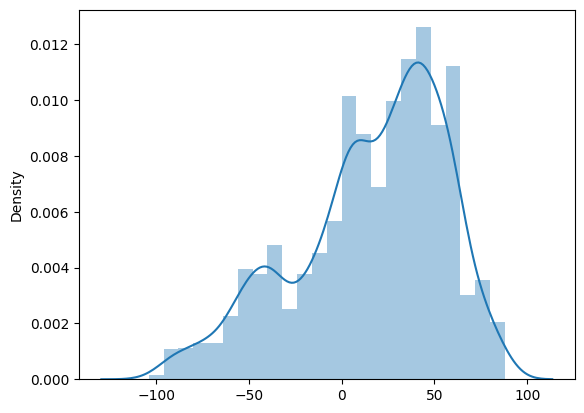

In [188]:
sns.distplot(y_test-y_pred)

* **Lasso Regression** is employed in this code snippet, a linear regression technique that introduces L1 regularization. The code utilizes the `Lasso` model from the scikit-learn library.

* A grid search is performed to find the optimal hyperparameter, alpha, which controls the strength of the regularization. 
* The search is conducted over a specified range of alpha values, and the scoring metric is set to negative mean squared error with 5-fold cross-validation.

* After fitting the Lasso model to the training data, the best hyperparameters and their corresponding scores are printed.
* Following the hyperparameter tuning, predictions are made on the test set, and Mean Squared Error (MSE) and R-squared (R²) metrics are computed.
* Finally, a distribution plot of the residuals is visualized using Seaborn.

In [189]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-3896.1557573734653


In [190]:
y_pred = lasso_regressor.predict(X_test).round(0).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1020.7258620689655
R-squared (R²): 0.7420761937194345


<Axes: ylabel='Density'>

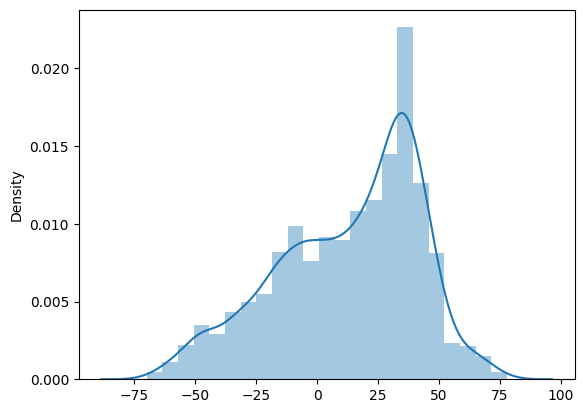

In [191]:
sns.distplot(y_test-y_pred)

In [192]:
tree = DecisionTreeRegressor(max_depth=17,random_state=42)  
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=17, random_state=42)

* Below code, covering Decision Tree Regression, Random Forest Regression, and a Simple Neural Network (using Keras) for predicting outcomes.
* A Decision Tree Regression model is created in this code snippet using the `DecisionTreeRegressor` from scikit-learn. 
* The model is configured with a maximum depth of 17 and a random state of 42 for reproducibility.
* redictions are then made on the test set, and Mean Squared Error (MSE) and R-squared (R²) metrics are computed and printed.
* Next, a **Random Forest Regression** model is trained with 150 estimators using the RandomForestRegressor.
* Similar to the Decision Tree, predictions, MSE, and R² are computed and displayed.


In [193]:
y_pred = tree.predict(X_test).round(0).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.021551724137931036
R-squared (R²): 0.9999945541668649


In [194]:
regressor = RandomForestRegressor(n_estimators=150, random_state=43)  
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=43)

In [195]:
y_pred = regressor.predict(X_test).round(0).astype(int)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 52.35474137931035
R-squared (R²): 0.9867706553980955


**Simple Neural Network using Keras**:
* a simple neural network model is defined using Keras. The model consists of several dense layers with varying numbers of nodes and uses the 'relu' activation function. 
* It is compiled using the Adam optimizer and mean squared error loss function.
* Predictions are then made on the test set, and MSE and R² metrics are calculated and printed

In [198]:
src = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1)  
])

src.compile(optimizer='adam', loss='mean_squared_error')
src.fit(X_train, y_train, epochs=150, batch_size=32,validation_data=(X_val, y_val))

Epoch 1/150
365/365 [==============================] - 2s 3ms/step - loss: 27882.9160 - val_loss: 36052.7852
Epoch 2/150
365/365 [==============================] - 1s 2ms/step - loss: 13712.7529 - val_loss: 10283.9814
Epoch 3/150
365/365 [==============================] - 1s 2ms/step - loss: 7340.9561 - val_loss: 8342.7695
Epoch 4/150
365/365 [==============================] - 1s 2ms/step - loss: 5004.2876 - val_loss: 2250.8821
Epoch 5/150
365/365 [==============================] - 1s 2ms/step - loss: 3515.7703 - val_loss: 1565.8903
Epoch 6/150
365/365 [==============================] - 1s 2ms/step - loss: 3049.3516 - val_loss: 1300.9167
Epoch 7/150
365/365 [==============================] - 1s 2ms/step - loss: 2870.7893 - val_loss: 1800.5692
Epoch 8/150
365/365 [==============================] - 1s 2ms/step - loss: 2761.6843 - val_loss: 1356.6279
Epoch 9/150
365/365 [==============================] - 1s 2ms/step - loss: 2710.2927 - val_loss: 1243.0542
Epoch 10/150
365/365 [===========

In [199]:
y_pred = src.predict(X_test).round(0).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

73/73 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 16.693103448275863
R-squared (R²): 0.995781875486835


# ODI Match Winner

Two datasets are loaded in this code snippet from the Kaggle input directory related to the ICC Men's World Cup 2023.

1. **Total Score Data:**
   The `deliveries.csv` file is loaded into a Pandas DataFrame named `total_score`. This dataset likely contains information about deliveries made in cricket matches, including details such as runs scored, wickets taken, and more.
2. Additionally, the matches.csv file is loaded into a DataFrame named match.
3. The total_score.tail() command is used to display the last few rows of the total_score DataFrame, providing a quick overview of the data structure and content

In [251]:
total_score = pd.read_csv('/kaggle/input/icc-mens-world-cup-2023/deliveries.csv')

In [252]:
match = pd.read_csv('/kaggle/input/icc-mens-world-cup-2023/matches.csv')

In [253]:
total_score.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17379,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.3,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,NaN,NaN,NaN,NaN,NaN,caught,GD Phillips,NaN,NaN


In [254]:
match.tail()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
27,2023/24,Netherlands,Bangladesh,2023/10/28,28,Eden Gardens,Kolkata,Netherlands,bat,PA van Meekeren,JS Wilson,P Wilson,CB Gaffaney,JJ Crowe,Netherlands,87.0,NaN,Group
28,2023/24,India,England,2023/10/29,29,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,England,field,RG Sharma,AT Holdstock,RJ Tucker,CM Brown,RB Richardson,India,100.0,NaN,Group
29,2023/24,Sri Lanka,Afghanistan,2023/10/30,30,Maharashtra Cricket Association Stadium,Pune,Afghanistan,field,Fazalhaq Farooqi,CB Gaffaney,RK Illingworth,M Erasmus,J Srinath,Afghanistan,NaN,7.0,Group
30,2023/24,Bangladesh,Pakistan,2023/10/31,31,Eden Gardens,Kolkata,Bangladesh,bat,Fakhar Zaman,Nitin Menon,RA Kettleborough,PR Reiffel,AJ Pycroft,Pakistan,NaN,7.0,Group
31,2023/24,South Africa,New Zealand,2023/11/01,32,Maharashtra Cricket Association Stadium,Pune,New Zealand,field,HE van der Dussen,Ahsan Raza,HDPK Dharmasena,P Wilson,RB Richardson,South Africa,190.0,NaN,Group


* ## Calculating Total Runs per Innings

In this code snippet, the `total_score` DataFrame, which likely contains data about deliveries in cricket matches, is used to calculate the total runs scored in each innings.

### Grouping by Match and Innings

The DataFrame is grouped by the 'match_id' and 'innings' columns, and the sum of runs scored ('runs_off_bat') and extras is computed for each group.

* **Resetting Index and Computing Total Runs**
* The index of the resulting DataFrame is reset, and a new column 'total' is created by adding runs scored ('runs_off_bat'), extras, and 1 (possibly representing a run scored). The individual columns for runs and extras are then dropped.
* The first 10 rows of the resulting DataFrame are displayed to provide a snapshot of the calculated total runs per innings.

In [255]:
result = total_score.groupby(['match_id', 'innings'])[['runs_off_bat', 'extras']].sum()

result = result.reset_index()

result['total'] = result['runs_off_bat'] + result['extras'] + 1
result.drop(['runs_off_bat' , 'extras'], axis=1, inplace=True)
result.head(10)

,match_id,innings,total
0,1,1,283
1,1,2,284
2,2,1,287
3,2,2,206
4,3,1,157
5,3,2,159
6,4,1,429
7,4,2,327
8,5,1,200
9,5,2,202


 ## Combining Cricket Match Data

In this code segment, the goal appears to be combining and processing cricket match data to analyze the cumulative runs scored in innings.

### Filtering First Innings Data

* The initial DataFrame, `result`, is filtered to include only records corresponding to the first innings ('innings' == 1):
* The 'total' column from the filtered result DataFrame is merged with the match DataFrame based on the 'match_number' and 'match_id' columns, creating a new DataFrame named match_final
* Another merge operation is performed, this time combining relevant columns from the match_final DataFrame and the total_score DataFrame to create a new DataFrame named final_cricket

In [256]:
result = result[result['innings'] == 1]

In [257]:
match_final = match.merge(result[['match_id', 'total']], left_on = 'match_number', right_on = 'match_id')

In [258]:
match_final.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type,match_id,total
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group,1,283
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group,2,287
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group,3,157
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group,4,429
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group,5,200


In [259]:
final_cricket = match_final[['match_id','winner','total']].merge(total_score, on = 'match_id')

In [260]:
final_cricket

,match_id,winner,total,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,South Africa,358,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,32,South Africa,358,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,32,South Africa,358,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17378,32,South Africa,358,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **Filtering Second Innings Data**
* The final_cricket DataFrame is filtered to include only records corresponding to the second innings ('innings' == 2):
* Computing Cumulative Runs
* A new column 'cumulative_runs' is created in the final_cricket DataFrame, representing the cumulative runs scored. 
* This is calculated by summing the runs and extras for each delivery within each match and innings using the cumsum() function:

In [261]:
final_cricket = final_cricket[final_cricket['innings'] == 2]

In [262]:
final_cricket['cumulative_runs'] = final_cricket.groupby(['match_id', 'innings'])['runs_off_bat'].cumsum() + final_cricket.groupby(['match_id', 'innings'])['extras'].cumsum()

In [263]:
final_cricket.head()

,match_id,winner,total,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cumulative_runs
304,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.1,New Zealand,England,DP Conway,WA Young,CR Woakes,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
305,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.2,New Zealand,England,DP Conway,WA Young,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
306,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.3,New Zealand,England,DP Conway,WA Young,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
307,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.4,New Zealand,England,DP Conway,WA Young,CR Woakes,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
308,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.5,New Zealand,England,DP Conway,WA Young,CR Woakes,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


## Calculating Runs Left and Ball Information

In this code segment, additional columns are created in the `final_cricket` DataFrame to provide insights into the remaining runs and ball count during the second innings of cricket matches.

*  Calculating Runs Left

* A new column 'runs_left' is added to the DataFrame, representing the runs still required by the batting team to win. This is computed by subtracting the cumulative runs scored from the total target for each match.
* The 'ball' column is extracted from the existing DataFrame.


In [264]:
final_cricket['runs_left'] = final_cricket['total'] - final_cricket['cumulative_runs']

In [265]:
final_cricket['ball']

304       0.1
305       0.2
306       0.3
307       0.4
308       0.5
         ... 
17375    34.5
17376    34.6
17377    35.1
17378    35.2
17379    35.3
Name: ball, Length: 7887, dtype: float64

## Calculating Balls Played and Balls Left

In this code snippet, additional columns are computed in the `final_cricket` DataFrame to analyze the number of balls played and the remaining balls for the batting team during the second innings of cricket matches.

### Calculating Balls Played

* A new column 'balls_played' is created using the 'ball' column in the DataFrame. It appears to convert the ball information into the total number of balls faced. 
* The lambda function is applied to each element in the 'ball' column, converting the decimal part of the ball into a fraction of 6 (representing balls in an over) and adding it to the integer part multiplied by 6 (representing complete overs):


In [266]:
balls_played = final_cricket['ball'].apply(lambda x: int(x) * 6 + int((x * 10) % 10))

In [267]:
final_cricket['balls_left'] = 300 - balls_played

In [268]:
final_cricket.head()

,match_id,winner,total,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cumulative_runs,runs_left,balls_left
304,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.1,New Zealand,England,DP Conway,WA Young,CR Woakes,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,279,299
305,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.2,New Zealand,England,DP Conway,WA Young,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,279,298
306,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.3,New Zealand,England,DP Conway,WA Young,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,279,297
307,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.4,New Zealand,England,DP Conway,WA Young,CR Woakes,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,277,296
308,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.5,New Zealand,England,DP Conway,WA Young,CR Woakes,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,273,295


## Analyzing Cricket Match Statistics

In this code section, several columns are computed and added to the `final_cricket` DataFrame, providing valuable statistics and insights into the progress and outcome of cricket matches.

### Calculating Wickets Left

* A new column 'wickets_left' is created based on the 'wicket_type' column. 
* It is initially set to 1 for each wicket taken and 0 for no wicket. 
* The cumulative sum of wickets taken is then calculated for each match and innings combination.
**Calculating Run Rates (CRR and RRR)**
* Two new columns 'crr' and 'rrr' are added to the DataFrame. 
* 'crr' represents the current run rate, calculated by dividing the cumulative runs scored by the remaining overs (300 - balls_left).
* 'rrr' represents the required run rate, calculated by dividing the remaining runs to score by the remaining overs.
## Determining Match Result
* A new column 'result' is created using a lambda function, marking matches as 1 if the batting team is the winner and 0 otherwise.
***** Selecting Match Winner Statistics****
* A new DataFrame named match_winner is created, containing a subset of columns for statistical analysis. 
* It is sampled to shuffle the order and then filtered to exclude matches where the batting team has no balls left to play.
* This series of operations provides a comprehensive set of statistics for analyzing cricket match outcomes, including information on runs left, balls left, wickets left, run rates, and match results.

In [269]:
final_cricket['wickets_left'] = final_cricket['wicket_type'].apply(lambda x: 1 if not pd.isna(x) else 0)
final_cricket['wickets_left'] = final_cricket.groupby(['match_id', 'innings'])['wickets_left'].cumsum()
final_cricket['wickets_left'] = 10 - final_cricket['wickets_left']

In [270]:
final_cricket['crr'] = final_cricket['cumulative_runs'] * 6 / (300 - final_cricket['balls_left'])

In [271]:
final_cricket['rrr'] = final_cricket['runs_left'] * 6 / final_cricket['balls_left']

In [272]:
final_cricket['result'] = final_cricket.apply(lambda row: 1 if row['batting_team'] == row['winner'] else 0, axis=1)

In [273]:
match_winner = final_cricket[['batting_team', 'bowling_team', 'venue', 'runs_left', 'balls_left', 'wickets_left', 'total', 'crr', 'rrr', 'result']]

In [274]:
match_winner = match_winner.sample(match_winner.shape[0])

In [275]:
match_winner = match_winner[match_winner['balls_left'] != 0]

In [276]:
match_winner

,batting_team,bowling_team,venue,runs_left,balls_left,wickets_left,total,crr,rrr,result
3120,Netherlands,New Zealand,"Rajiv Gandhi International Stadium, Uppal, Hyd...",216,157,7,323,4.489510,8.254777,0
4208,Pakistan,Sri Lanka,"Rajiv Gandhi International Stadium, Uppal, Hyd...",308,257,9,345,5.162791,7.190661,1
17288,New Zealand,South Africa,"Maharashtra Cricket Association Stadium, Pune",267,177,5,358,4.439024,9.050847,0
8578,Afghanistan,New Zealand,"MA Chidambaram Stadium, Chepauk, Chennai",225,183,7,289,3.282051,7.377049,0
4362,Pakistan,Sri Lanka,"Rajiv Gandhi International Stadium, Uppal, Hyd...",142,108,8,345,6.343750,7.888889,1
...,...,...,...,...,...,...,...,...,...,...
8481,Afghanistan,New Zealand,"MA Chidambaram Stadium, Chepauk, Chennai",276,278,10,289,3.545455,5.956835,0
12631,Bangladesh,South Africa,"Wankhede Stadium, Mumbai",230,85,3,383,4.269767,16.235294,0
10188,Sri Lanka,Netherlands,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,227,257,9,263,5.023256,5.299611,1
16796,Pakistan,Bangladesh,"Eden Gardens, Kolkata",63,163,9,205,6.218978,2.319018,1


## Building and Training a Binary Classification Model

This code segment involves preparing and training a binary classification model to predict the outcome of cricket matches (win or loss).

### Data Preparation

* The dataset is split into features (X) and the target variable (y). The features include various columns related to the batting team, bowling team, venue, and other match-related information:

 **Train-Test Split**
* The data is then split into training and testing sets using the train_test_split function from scikit-learn. 80% of the data is used for training, and 20% is reserved for testing.

**Column Transformation**

* A ColumnTransformer is employed to apply one-hot encoding to categorical columns and leave the remaining columns unchanged. The transformed data is then passed through the pipeline.

**Defining the Neural Network Model**:
* * A function named final is created to define a simple neural network model using TensorFlow and Keras. The model has an input layer with 33 neurons, a hidden layer with 16 neurons and ReLU activation, a dropout layer to prevent overfitting, and an output layer with 1 neuron and a sigmoid activation function for binary classification.

**Wrapping Keras Model for Scikit-Learn**

* The Keras model is wrapped using KerasClassifier to make it compatible with scikit-learn's pipeline. The pipeline consists of the column transformation and the neural network model.

**Model Training**
* The pipeline is then fitted to the training data, training the neural network model.

This code encapsulates the process of preparing the data, defining a neural network model, and training the model using a scikit-learn pipeline for binary classification tasks related to cricket match outcomes.



In [277]:
X = match_winner.iloc[:,:-1]
y = match_winner.iloc[:,-1]

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [280]:
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False, drop='first'), ['batting_team', 'bowling_team', 'venue'])
], remainder='passthrough')

In [281]:
def final():
    winner = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(33,)), 
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    winner.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return winner

In [282]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = final, epochs = 10, batch_size = 32)

In [283]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', model)
])

In [285]:
pipe.fit(X_train, y_train)

Epoch 1/10
198/198 [==============================] - 1s 2ms/step - loss: 7.4171 - accuracy: 0.6631
Epoch 2/10
198/198 [==============================] - 0s 2ms/step - loss: 0.9159 - accuracy: 0.7655
Epoch 3/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.7311
Epoch 4/10
198/198 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.7570
Epoch 5/10
198/198 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.7769
Epoch 6/10
198/198 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.7942
Epoch 7/10
198/198 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8066
Epoch 8/10
198/198 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8134
Epoch 9/10
198/198 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8251
Epoch 10/10
198/198 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8507

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team',
                                                   'venue'])])),
                ('step2',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7b4758c876a0>)])

## Analyzing Cricket Match Predictions and Visualization

* In this section, the trained model is used to make predictions on test data, and a function is defined to visualize the progression of a specific cricket match.

### Predictions on Test Data

* The trained pipeline (`pipe`) is used to predict outcomes and probabilities on the test data (`X_test`):
* The probabilities of the classes are displayed for a specific example.
* Descriptive statistics are calculated on the training data (X_train.describe()) to gain insights into the distribution of numerical features.


In [286]:
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)

50/50 [==============================] - 0s 1ms/step


In [287]:
y_prob[11]

array([0.01350278, 0.9864972 ], dtype=float32)

In [288]:
X_train.describe()

,runs_left,balls_left,wickets_left,total,crr,rrr
count,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000
mean,174.682308,174.310399,6.908053,288.852885,5.393260,6.455956
std,93.998800,75.776193,2.433992,68.777528,1.766367,4.199412
min,-5.000000,-1.000000,0.000000,157.000000,0.000000,-36.000000
25%,104.000000,115.000000,5.000000,242.000000,4.348901,4.411765
50%,169.000000,179.000000,7.000000,283.000000,5.271878,5.518753
75%,241.000000,239.000000,9.000000,345.000000,6.348500,8.026824
max,428.000000,299.000000,10.000000,429.000000,48.000000,75.272727


In [289]:
'''logistic_regression = LogisticRegression(solver='saga', max_iter=200)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)'''

"logistic_regression = LogisticRegression(solver='saga', max_iter=200)\nlogistic_regression.fit(X_train, y_train)\ny_pred = logistic_regression.predict(X_test)"

In [290]:
#logistic_regression.predict_proba(X_test)[10]

In [291]:
#winner.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

In [292]:
'''y_pred = winner.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)'''

'y_pred = winner.predict(X_test)\ny_pred = (y_pred > 0.5).astype(int)'

In [293]:
#np.column_stack((y_pred, 1-y_pred))

In [294]:
#1-y_pred

* **Match Summary and Head of the DataFrame**
* A function match_summary is defined to print a summary of a cricket match, and the first two rows of the final_cricket DataFrame are displayed:
*** **Match Progression Function****
* A function match_progression is defined to visualize the progression of a specific cricket match. 
* It takes the DataFrame, match ID, and the trained pipeline as inputs. 
* The function identifies key events at the end of overs, calculates probabilities, and provides information on runs, wickets, and probabilities.
* **Plotting Match Progression:**
* The progression of the match is visualized using matplotlib. The plot displays the number of wickets, winning probabilities, losing probabilities, and runs scored after each over:

In [295]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total']))

In [296]:
final_cricket.head(2)

,match_id,winner,total,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cumulative_runs,runs_left,balls_left,wickets_left,crr,rrr,result
304,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.1,New Zealand,England,DP Conway,WA Young,CR Woakes,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,279,299,10,24.0,5.598662,1
305,1,New Zealand,283,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",2,0.2,New Zealand,England,DP Conway,WA Young,CR Woakes,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,279,298,10,12.0,5.617450,1


In [297]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match['fractional_part'] = match['ball'].apply(lambda x: x - int(x))
    tolerance = 1e-10
    match = match[np.isclose(match['fractional_part'], 0.6, atol=tolerance)]
    temp_df = match[['batting_team','bowling_team','venue','runs_left','balls_left','wickets_left','total','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [298]:
temp_df,target = match_progression(final_cricket,9,pipe)
temp_df

2/2 [==============================] - 0s 5ms/step
Target- 273


,end_of_over,runs_after_over,wickets_in_over,lose,win
4783,1,2,0,59.799999,40.200001
4790,2,5,0,60.500000,39.500000
4796,3,6,0,61.599998,38.400002
4802,4,10,0,61.900002,38.099998
4808,5,14,0,61.500000,38.500000
4814,6,10,0,62.500000,37.500000
4820,7,17,0,33.299999,66.699997
4826,8,11,0,20.299999,79.699997
4832,9,11,0,10.500000,89.500000
4839,10,4,0,10.400000,89.599998


Text(0.5, 1.0, 'Target-273')

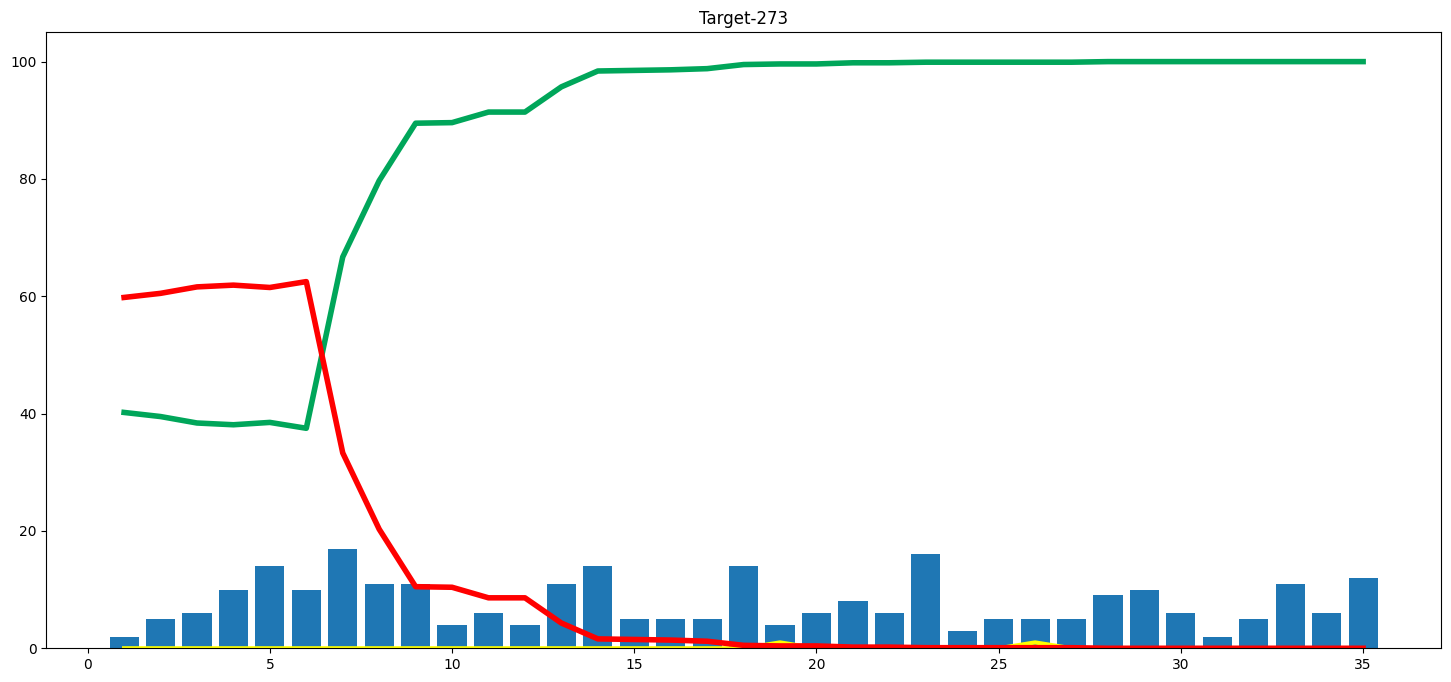

In [299]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

## **Saving the Model**
### Creating Team and Venue Lists

* Unique values from the 'batting_team' and 'venue' columns of the `match_winner` DataFrame are sorted and stored in the variables `teams` and `venue` respectively:

* Finally, the trained pipeline (pipe) is saved to a pickle file named 'pipe.pkl':

In [300]:
teams = sorted(match_winner['batting_team'].unique())

In [301]:
venue = sorted(match_winner['venue'].unique())

In [302]:
pickle.dump(pipe, open('pipe.pkl','wb'))

# Team Composition

## Web Scraping and Data Manipulation for Cricket Statistics
 
* This code section involves web scraping to extract batting and bowling statistics for a cricket series from a specific URL. The data is then processed and manipulated to create a unified dataset with player statistics.

* ### Setting Random Seed
* Setting the random seed ensures reproducibility of the code by generating the same random numbers each time it is run.
 
* **Web Scraping Batting Statistics**
* The batting statistics are retrieved from the specified URL using the requests library. The HTML content is parsed with BeautifulSoup to extract the required table. 
* The data is then processed and stored in a Pandas DataFrame (df).
* The batting DataFrame is displayed to inspect the extracted data.

* **Web Scraping Bowling Statistics**
* Similar to batting, bowling statistics are extracted from the second table on the webpage. The data is processed and stored in another Pandas DataFrame (df).
 
* **Filtering Data for Indian Players**
* A subset of the batting DataFrame is created, including only those rows where the 'Country' column is 'India'.
 
* **Data Cleaning and Merging:**
* The bowling DataFrame is cleaned by dropping the 'Country' column. Column names are standardized and then both batting and bowling DataFrames are merged into a new DataFrame (player_stats). 
* Redundant columns are dropped, and innings information is consolidated.
 
* **Filtering Data for Indian Players in the Merged DataFrame**
* The final DataFrame includes statistics for both batting and bowling, and only players from India are selected for inspection.
 
* This code effectively scrapes, processes, and merges cricket statistics, allowing for in-depth analysis
 

In [345]:
np.random.seed(0)

In [346]:
url = 'http://howstat.com/cricket/Statistics/WorldCup/SeriesAnalysis.asp?SeriesCode=1117'
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    batting_table = soup.find_all('table', {'class': 'TableLined'})[0] 
    
    data = []

    for row in batting_table.find_all('tr'):
        row_data = []

        for cell in row.find_all(['td', 'th']):
            cell_value = cell.text.strip().replace('\n', '').replace('\t', '').replace('\r', '')
  
            if cell_value == '-':
                cell_value = np.nan
        
            if not cell_value:
                cell_value = np.nan
            row_data.append(cell_value)
        
        data.append(row_data)

    df = pd.DataFrame(data)

    if not df.empty and df.iloc[0].count() > 0:
        df.columns = df.iloc[0]
        df = df[1:]

    display(df)
else:
    print('Failed to retrieve the webpage')

,Player,Country,Mat,Inns,NO,50s,100s,0s,HS,Runs,S/R,Avg,Ca,St,% Team Runs
1,"Kohli, V",India,9,9,3,5,2,1,103*,594,88.52,99.00,5,0,23.54%
2,"Williamson, K S",New Zealand,3,3,1,2,0,0,95,187,93.03,93.50,1,0,7.37%
3,"Maxwell, G J",Australia,7,7,2,0,2,1,201*,397,152.69,79.40,3,0,15.09%
4,Fakhar Zaman,Pakistan,4,4,1,1,1,0,126*,220,122.91,73.33,3,0,9.45%
5,"Ravindra, R",New Zealand,9,9,1,2,3,0,123*,565,108.45,70.63,3,0,22.27%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,"Sodhi, I S",New Zealand,1,0,0,0,0,0,NaN,0,NaN,NaN,0,0,NaN
148,"Abbott, S A",Australia,1,0,0,0,0,0,NaN,0,NaN,NaN,1,0,NaN
149,"Thakur, S N",India,3,0,0,0,0,0,NaN,0,NaN,NaN,1,0,NaN
150,"Pandya, H H",India,4,1,1,0,0,0,11*,11,137.50,NaN,1,0,0.44%


In [347]:
batting = df.copy()

In [348]:
url = 'http://howstat.com/cricket/Statistics/WorldCup/SeriesAnalysis.asp?SeriesCode=1117'
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    bowling_table = soup.find_all('table', {'class': 'TableLined'})[1] 
    
    data = []

    for row in bowling_table.find_all('tr'):
        row_data = []

        for cell in row.find_all(['td', 'th']):
            cell_value = cell.text.strip().replace('\n', '').replace('\t', '').replace('\r', '')
            if not cell_value:
                cell_value = np.nan
            row_data.append(cell_value)

        data.append(row_data)

    df = pd.DataFrame(data)

    if not df.empty and df.iloc[0].count() > 0:
        df.columns = df.iloc[0]
        df = df[1:] 

    display(df)
else:
    print('Failed to retrieve the webpage')

,Player,Country,Mat,O,M,R,W,4w,Best,Avg,S/R,E/R
1,"Sharma, R G",India,9,0.5,0,7,1,0,1/7,7.00,5.00,8.40
2,Mohammed Shami,India,5,32.0,3,153,16,3,5/18,9.56,12.00,4.78
3,"Kohli, V",India,9,3.3,0,15,1,0,1/13,15.00,21.00,4.29
4,"Bumrah, J J",India,9,72.5,6,266,17,1,4/39,15.65,25.71,3.65
5,"Mathews, A D",Sri Lanka,5,22.1,2,107,6,0,2/14,17.83,22.17,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...
98,"Asalanka, K I C",Sri Lanka,9,1.0,0,10,0,0,0/10,NaN,NaN,10.00
99,"Green, C",Australia,3,2.0,0,11,0,0,0/11,NaN,NaN,5.50
100,"Karunaratne, C",Sri Lanka,3,12.0,1,73,0,0,0/15,NaN,NaN,6.08
101,"Mitchell, D J",New Zealand,9,1.3,0,12,0,0,0/1,NaN,NaN,8.00


In [349]:
batting[batting['Country'] == 'India']

,Player,Country,Mat,Inns,NO,50s,100s,0s,HS,Runs,S/R,Avg,Ca,St,% Team Runs
1,"Kohli, V",India,9,9,3,5,2,1,103*,594,88.52,99.00,5,0,23.54%
7,"Iyer, S S",India,9,9,3,3,1,1,128*,421,106.58,70.17,5,0,16.69%
8,"Rahul, K L",India,9,8,3,1,1,0,102,347,93.53,69.40,11,1,13.75%
13,"Sharma, R G",India,9,9,0,3,1,1,131,503,121.50,55.89,1,0,19.94%
14,"Jadeja, R A",India,9,4,2,0,0,0,39*,111,115.63,55.50,4,0,4.40%
36,Shubman Gill,India,7,7,0,3,0,0,92,270,104.65,38.57,5,0,10.70%
70,Ishan Kishan,India,2,2,0,0,0,1,47,47,97.92,23.50,0,0,1.86%
75,"Yadav, S A",India,5,5,1,0,0,0,49,87,116.00,21.75,0,0,3.45%
91,"Bumrah, J J",India,9,2,1,0,0,0,16,17,65.38,17.00,1,0,0.67%
133,Mohammed Shami,India,5,3,1,0,0,0,2,4,40.00,2.00,2,0,0.16%


In [350]:
bowling = df.copy()

In [351]:
batting_players = set(batting['Player'])
bowling_players = set(bowling['Player'])

is_subset = bowling_players.issubset(batting_players)

print(is_subset)

True


In [352]:
bowling = bowling.drop(['Country'], axis=1)

In [353]:
batting = batting.rename(columns={'S/R': 'Bat_S/R', 'Avg': 'Bat_Avg'})
bowling = bowling.rename(columns={'S/R': 'Bowl_S/R', 'Avg': 'Bowl_Avg', 'Mat': 'Inns'})

In [354]:
player_stats = pd.merge(batting, bowling, on='Player', how='outer', suffixes=('_batting', '_bowling'))

In [355]:
player_stats['Inns'] = player_stats['Inns_bowling'].combine_first(player_stats['Inns_batting'])

In [356]:
player_stats = player_stats.drop(['Inns_batting', 'Inns_bowling'], axis=1)

In [357]:
player_stats[player_stats['Country'] == 'India']

,Player,Country,Mat,NO,50s,100s,0s,HS,Runs,Bat_S/R,Bat_Avg,Ca,St,% Team Runs,O,M,R,W,4w,Best,Bowl_Avg,Bowl_S/R,E/R,Inns
0,"Kohli, V",India,9,3,5,2,1,103*,594,88.52,99.00,5,0,23.54%,3.3,0,15,1,0,1/13,15.00,21.00,4.29,9
6,"Iyer, S S",India,9,3,3,1,1,128*,421,106.58,70.17,5,0,16.69%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,"Rahul, K L",India,9,3,1,1,0,102,347,93.53,69.40,11,1,13.75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
12,"Sharma, R G",India,9,0,3,1,1,131,503,121.50,55.89,1,0,19.94%,0.5,0,7,1,0,1/7,7.00,5.00,8.40,9
13,"Jadeja, R A",India,9,2,0,0,0,39*,111,115.63,55.50,4,0,4.40%,73.3,4,292,16,1,5/33,18.25,27.56,3.97,9
35,Shubman Gill,India,7,0,3,0,0,92,270,104.65,38.57,5,0,10.70%,2.0,0,11,0,0,0/11,NaN,NaN,5.50,7
69,Ishan Kishan,India,2,0,0,0,1,47,47,97.92,23.50,0,0,1.86%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
74,"Yadav, S A",India,5,1,0,0,0,49,87,116.00,21.75,0,0,3.45%,2.0,0,17,0,0,0/17,NaN,NaN,8.50,5
90,"Bumrah, J J",India,9,1,0,0,0,16,17,65.38,17.00,1,0,0.67%,72.5,6,266,17,1,4/39,15.65,25.71,3.65,9
132,Mohammed Shami,India,5,1,0,0,0,2,4,40.00,2.00,2,0,0.16%,32.0,3,153,16,3,5/18,9.56,12.00,4.78,5


## Data Cleaning and Transformation

* This section involves cleaning and transforming the cricket player statistics dataset (`player_stats`). Various operations are performed to ensure consistency and convert data types.
 
* ### Unique Countries in the Dataset
 
* The unique countries present in the 'Country' column of the dataset are displayed.
 
* **Filtering Data for England**
* A subset of the dataset is created, including only those rows where the 'Country' column is 'England'.
* **Shape of Data for Netherlands**
* The shape (number of rows and columns) of the dataset for players from the Netherlands is displayed.
 
* **Data Cleaning Operations**
* Several cleaning operations are performed, including removing '*', extracting the first part of 'Best' scores, removing '%' from '% Team Runs', and filling missing values with 0.

* **Data Type Conversion**
* Numeric columns are converted to the appropriate data types using the pd.to_numeric function.
 
* **Resetting Index**
* The index of the DataFrame is reset.

* **Feature Selection
* A list of features is defined for further analysis.
 
* **Creating a 'PlayingXI' Column**:
* A new column 'PlayingXI' is created, indicating whether a player is likely to be part of the playing XI based on the number of innings played.
 
* **Filtering Data for Indian Players**
* A subset of the dataset is created, including only those rows where the 'Country' column is 'India'.

In [358]:
player_stats['Country'].unique()

array(['India', 'New Zealand', 'Australia', 'Pakistan', 'Afghanistan',
       'South Africa', 'Bangladesh', 'Sri Lanka', 'England',
       'Netherlands'], dtype=object)

In [359]:
player_stats[player_stats['Country'] == 'England']

,Player,Country,Mat,NO,50s,100s,0s,HS,Runs,Bat_S/R,Bat_Avg,Ca,St,% Team Runs,O,M,R,W,4w,Best,Bowl_Avg,Bowl_S/R,E/R,Inns
20,"Stokes, B A",England,6,0,2,1,1,108,304,89.15,50.67,6,0,13.54%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
24,"Malan, D J",England,9,0,2,1,0,140,404,101.00,44.89,4,0,18.00%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
51,"Root, J E",England,9,0,3,0,1,82,276,88.46,30.67,5,0,12.29%,10.1,0,67,1,0,1/19,67.00,61.00,6.59,9
54,"Wood, M A",England,7,4,0,0,1,43*,85,130.77,28.33,1,0,3.79%,54.0,1,349,6,0,2/50,58.17,54.00,6.46,7
55,"Brook, H C",England,6,0,1,0,0,66,169,112.67,28.17,0,0,7.53%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
67,"Bairstow, J M",England,9,0,2,0,1,59,215,88.48,23.89,5,0,9.58%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
83,"Willey, D J",England,6,2,0,0,0,16*,78,116.42,19.50,1,0,3.47%,51.0,6,259,11,0,3/45,23.55,27.82,5.08,6
85,"Woakes, C R",England,8,1,1,0,1,51,131,84.52,18.71,3,0,5.84%,55.0,1,298,10,1,4/54,29.80,33.00,5.42,8
87,"Atkinson, A A P",England,3,1,0,0,1,35,37,160.87,18.50,0,0,1.65%,24.0,0,146,4,0,2/45,36.50,36.00,6.08,3
95,"Ali, M M",England,6,0,0,0,0,42,95,74.80,15.83,4,0,4.23%,42.4,0,248,5,0,3/42,49.60,51.20,5.81,6


In [360]:
player_stats[player_stats['Country'] == 'Netherlands'].shape

(15, 24)

In [361]:
player_stats['HS'] = player_stats['HS'].str.replace(r'\*$', '', regex=True)

In [362]:
type(player_stats['Mat'][1])

str

In [363]:
player_stats['Best'] = player_stats['Best'].str.split('/').str[0]

In [364]:
player_stats['% Team Runs'] = player_stats['% Team Runs'].str.rstrip('%')

In [365]:
player_stats = player_stats.fillna(0)

In [366]:
player_stats

,Player,Country,Mat,NO,50s,100s,0s,HS,Runs,Bat_S/R,Bat_Avg,Ca,St,% Team Runs,O,M,R,W,4w,Best,Bowl_Avg,Bowl_S/R,E/R,Inns
0,"Kohli, V",India,9,3,5,2,1,103,594,88.52,99.00,5,0,23.54,3.3,0,15,1,0,1,15.00,21.00,4.29,9
1,"Williamson, K S",New Zealand,3,1,2,0,0,95,187,93.03,93.50,1,0,7.37,0,0,0,0,0,0,0,0,0,3
2,"Maxwell, G J",Australia,7,2,0,2,1,201,397,152.69,79.40,3,0,15.09,52.3,1,260,5,0,2,52.00,63.00,4.95,7
3,Fakhar Zaman,Pakistan,4,1,1,1,0,126,220,122.91,73.33,3,0,9.45,0,0,0,0,0,0,0,0,0,4
4,"Ravindra, R",New Zealand,9,1,2,3,0,123,565,108.45,70.63,3,0,22.27,58.4,0,333,5,0,2,66.60,70.40,5.68,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"Sodhi, I S",New Zealand,1,0,0,0,0,0,0,0,0,0,0,0,4.0,0,44,0,0,0,0,0,11.00,1
147,"Abbott, S A",Australia,1,0,0,0,0,0,0,0,0,1,0,0,10.0,0,61,2,0,2,30.50,30.00,6.10,1
148,"Thakur, S N",India,3,0,0,0,0,0,0,0,0,1,0,0,17.0,0,102,2,0,1,51.00,51.00,6.00,3
149,"Pandya, H H",India,4,1,0,0,0,11,11,137.50,0,1,0,0.44,16.3,0,113,5,0,2,22.60,19.80,6.85,4


In [367]:
player_stats[['Mat', 'Inns', 'NO', '50s', '100s', '0s', 'HS', 'Runs', 'Bat_S/R', 'Bat_Avg', 'Ca', 'St', '% Team Runs', 'O', 'M', 'R', 'W', '4w', 'Best', 'Bowl_Avg', 'Bowl_S/R', 'E/R']] = player_stats[['Mat', 'Inns', 'NO', '50s', '100s', '0s', 'HS', 'Runs', 'Bat_S/R', 'Bat_Avg', 'Ca', 'St', '% Team Runs', 'O', 'M', 'R', 'W', '4w', 'Best', 'Bowl_Avg', 'Bowl_S/R', 'E/R']].apply(pd.to_numeric)

In [368]:
player_stats = player_stats.reset_index(drop=True)

In [369]:
player_stats

,Player,Country,Mat,NO,50s,100s,0s,HS,Runs,Bat_S/R,Bat_Avg,Ca,St,% Team Runs,O,M,R,W,4w,Best,Bowl_Avg,Bowl_S/R,E/R,Inns
0,"Kohli, V",India,9,3,5,2,1,103,594,88.52,99.00,5,0,23.54,3.3,0,15,1,0,1,15.0,21.0,4.29,9
1,"Williamson, K S",New Zealand,3,1,2,0,0,95,187,93.03,93.50,1,0,7.37,0.0,0,0,0,0,0,0.0,0.0,0.00,3
2,"Maxwell, G J",Australia,7,2,0,2,1,201,397,152.69,79.40,3,0,15.09,52.3,1,260,5,0,2,52.0,63.0,4.95,7
3,Fakhar Zaman,Pakistan,4,1,1,1,0,126,220,122.91,73.33,3,0,9.45,0.0,0,0,0,0,0,0.0,0.0,0.00,4
4,"Ravindra, R",New Zealand,9,1,2,3,0,123,565,108.45,70.63,3,0,22.27,58.4,0,333,5,0,2,66.6,70.4,5.68,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"Sodhi, I S",New Zealand,1,0,0,0,0,0,0,0.00,0.00,0,0,0.00,4.0,0,44,0,0,0,0.0,0.0,11.00,1
147,"Abbott, S A",Australia,1,0,0,0,0,0,0,0.00,0.00,1,0,0.00,10.0,0,61,2,0,2,30.5,30.0,6.10,1
148,"Thakur, S N",India,3,0,0,0,0,0,0,0.00,0.00,1,0,0.00,17.0,0,102,2,0,1,51.0,51.0,6.00,3
149,"Pandya, H H",India,4,1,0,0,0,11,11,137.50,0.00,1,0,0.44,16.3,0,113,5,0,2,22.6,19.8,6.85,4


In [370]:
features = ['NO', '50s', '100s', '0s', 'HS', 'Runs', 'Bat_S/R', 'Bat_Avg', 'Ca', 'St', '% Team Runs', 'O', 'M', 'R', 'W', '4w', 'Best', 'Bowl_Avg', 'Bowl_S/R', 'E/R']

In [371]:
player_stats['PlayingXI'] = player_stats['Inns'].apply(lambda x: 0 if (9 - x)/9 > 0.4 else 1)

In [372]:
player_stats[player_stats['Country'] == 'India']

,Player,Country,Mat,NO,50s,100s,0s,HS,Runs,Bat_S/R,Bat_Avg,Ca,St,% Team Runs,O,M,R,W,4w,Best,Bowl_Avg,Bowl_S/R,E/R,Inns,PlayingXI
0,"Kohli, V",India,9,3,5,2,1,103,594,88.52,99.00,5,0,23.54,3.3,0,15,1,0,1,15.00,21.00,4.29,9,1
6,"Iyer, S S",India,9,3,3,1,1,128,421,106.58,70.17,5,0,16.69,0.0,0,0,0,0,0,0.00,0.00,0.00,9,1
7,"Rahul, K L",India,9,3,1,1,0,102,347,93.53,69.40,11,1,13.75,0.0,0,0,0,0,0,0.00,0.00,0.00,8,1
12,"Sharma, R G",India,9,0,3,1,1,131,503,121.50,55.89,1,0,19.94,0.5,0,7,1,0,1,7.00,5.00,8.40,9,1
13,"Jadeja, R A",India,9,2,0,0,0,39,111,115.63,55.50,4,0,4.40,73.3,4,292,16,1,5,18.25,27.56,3.97,9,1
35,Shubman Gill,India,7,0,3,0,0,92,270,104.65,38.57,5,0,10.70,2.0,0,11,0,0,0,0.00,0.00,5.50,7,1
69,Ishan Kishan,India,2,0,0,0,1,47,47,97.92,23.50,0,0,1.86,0.0,0,0,0,0,0,0.00,0.00,0.00,2,0
74,"Yadav, S A",India,5,1,0,0,0,49,87,116.00,21.75,0,0,3.45,2.0,0,17,0,0,0,0.00,0.00,8.50,5,0
90,"Bumrah, J J",India,9,1,0,0,0,16,17,65.38,17.00,1,0,0.67,72.5,6,266,17,1,4,15.65,25.71,3.65,9,1
132,Mohammed Shami,India,5,1,0,0,0,2,4,40.00,2.00,2,0,0.16,32.0,3,153,16,3,5,9.56,12.00,4.78,5,0


* ## Building and Evaluating a Player Selection Model

* The specific algorithm used is a **neural network with multiple hidden layers**, implemented using TensorFlow's Keras API.

* In this section, a model is created to predict the likelihood of a cricket player being selected in the playing XI. The model is trained and evaluated, and player selection probabilities are analyzed.
 
* ### Splitting Data for Training and Testing
 
* The dataset is split into training and testing sets using the train_test_split function.
 
* **Feature Scaling**
* The features are scaled using Min-Max scaling to ensure consistency in the range of values.
 
* **Building a Neural Network Model**
* A neural network model is defined using TensorFlow's Keras API, with multiple hidden layers and dropout for regularization.
 
* **Compiling and Training the Model**
* The model is compiled and trained on the training dataset.
 
* **Evaluating Model Accuracy**
* The accuracy of the model is evaluated on the testing dataset
 
* **Predicting Probabilities and Updating DataFrame**
* Probabilities of player selection are predicted and added to the original dataset.
 
* **Top 11 Predicted Players for Each Country**
* The top 11 players with the highest selection probabilities are identified for each country.
 
* **Count of Players in Playing XI**
* The count of players labeled as part of the playing XI is displayed.
 
* **Displaying the Updated DataFrame**
* The dataset is displayed with the added column for predicted probabilities.
 
* **Player Selection Probabilities for Team India**
* The model's predicted probabilities for player selection are analyzed specifically for Team India.
 
* This code segment effectively builds, trains, and evaluates a neural network model for predicting player selection probabilities in cricket playing XIs.

* The loss function 'binary_crossentropy' and the output layer with a single neuron and a sigmoid activation function indicate a binary classification model. 
* In binary classification, the model predicts a probability between 0 and 1, and the final decision is made based on a threshold (commonly 0.5 in this case). 
* If the predicted probability is above the threshold, the model classifies the instance as positive (selected in the playing XI), otherwise as negative.

In [373]:
X_train, X_test, y_train, y_test = train_test_split(player_stats[features], player_stats['PlayingXI'], test_size=0.2, random_state=0)

In [374]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [375]:
play_xi = tf.keras.Sequential([
        tf.keras.layers.Input(len(features),), 
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

play_xi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [376]:
play_xi.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 113ms/step - loss: 0.6641 - accuracy: 0.5938 - val_loss: 0.6599 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6734 - accuracy: 0.6042 - val_loss: 0.6456 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 28ms/step - loss: 0.6449 - accuracy: 0.6458 - val_loss: 0.6299 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6491 - accuracy: 0.6250 - val_loss: 0.6131 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6324 - accuracy: 0.6771 - val_loss: 0.5962 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.6092 - accuracy: 0.6667 - val_loss: 0.5786 - val_accuracy: 0.7500
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6131 - accuracy: 0.6562 - val_loss: 0.5606 - val_accuracy: 0.7500
Epoch 8/50
3/3 [==========

In [377]:
accuracy = play_xi.evaluate(X_test_scaled, y_test)[1]
accuracy

1/1 [==============================] - 0s 28ms/step - loss: 0.3209 - accuracy: 0.8710


0.8709677457809448

In [378]:
train_probabilities = play_xi.predict(X_train_scaled)
test_probabilities = play_xi.predict(X_test_scaled)

1/1 [==============================] - 0s 25ms/step


In [380]:
player_stats.loc[X_train.index, 'PredictedProbabilities'] = train_probabilities
player_stats.loc[X_test.index, 'PredictedProbabilities'] = test_probabilities

In [381]:
for country in player_stats['Country'].unique():
    top_players = player_stats[player_stats['Country'] == country].nlargest(11, 'PredictedProbabilities')['Player']
    print(f"\nTop 11 players with the highest probability for {country}:\n{top_players}")


Top 11 players with the highest probability for India:
0            Kohli, V
6           Iyer, S S
13        Jadeja, R A
7          Rahul, K L
12        Sharma, R G
90        Bumrah, J J
141     Kuldeep Yadav
140    Mohammed Siraj
35       Shubman Gill
150         Ashwin, R
132    Mohammed Shami
Name: Player, dtype: object

Top 11 players with the highest probability for New Zealand:
4          Ravindra, R
48        Santner, M J
84          Boult, T A
30       Phillips, G D
11       Mitchell, D J
113         Henry, M J
25         Conway, D P
50       Latham, T W M
136      Ferguson, L H
43          Young, W A
1      Williamson, K S
Name: Player, dtype: object

Top 11 players with the highest probability for Australia:
14        Warner, D A
2        Maxwell, G J
133    Hazlewood, J R
53       Cummins, P J
111        Starc, M A
41     Labuschagne, M
94           Zampa, A
10         Marsh, M R
86        Inglis, J P
36       Smith, S P D
137        Carey, A T
Name: Player, dtype: object



In [382]:
player_stats['PlayingXI'].value_counts()

PlayingXI
1    104
0     47
Name: count, dtype: int64

In [383]:
player_stats

,Player,Country,Mat,NO,50s,100s,0s,HS,Runs,Bat_S/R,Bat_Avg,Ca,St,% Team Runs,O,M,R,W,4w,Best,Bowl_Avg,Bowl_S/R,E/R,Inns,PlayingXI,PredictedProbabilities
0,"Kohli, V",India,9,3,5,2,1,103,594,88.52,99.00,5,0,23.54,3.3,0,15,1,0,1,15.0,21.0,4.29,9,1,0.999905
1,"Williamson, K S",New Zealand,3,1,2,0,0,95,187,93.03,93.50,1,0,7.37,0.0,0,0,0,0,0,0.0,0.0,0.00,3,0,0.612458
2,"Maxwell, G J",Australia,7,2,0,2,1,201,397,152.69,79.40,3,0,15.09,52.3,1,260,5,0,2,52.0,63.0,4.95,7,1,0.998455
3,Fakhar Zaman,Pakistan,4,1,1,1,0,126,220,122.91,73.33,3,0,9.45,0.0,0,0,0,0,0,0.0,0.0,0.00,4,0,0.709306
4,"Ravindra, R",New Zealand,9,1,2,3,0,123,565,108.45,70.63,3,0,22.27,58.4,0,333,5,0,2,66.6,70.4,5.68,9,1,0.999886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"Sodhi, I S",New Zealand,1,0,0,0,0,0,0,0.00,0.00,0,0,0.00,4.0,0,44,0,0,0,0.0,0.0,11.00,1,0,0.177924
147,"Abbott, S A",Australia,1,0,0,0,0,0,0,0.00,0.00,1,0,0.00,10.0,0,61,2,0,2,30.5,30.0,6.10,1,0,0.243024
148,"Thakur, S N",India,3,0,0,0,0,0,0,0.00,0.00,1,0,0.00,17.0,0,102,2,0,1,51.0,51.0,6.00,3,0,0.236778
149,"Pandya, H H",India,4,1,0,0,0,11,11,137.50,0.00,1,0,0.44,16.3,0,113,5,0,2,22.6,19.8,6.85,4,0,0.158147


In [384]:
team_india_data = player_stats[player_stats['Country'] == 'India']

player_probabilities = team_india_data.groupby('Player')['PredictedProbabilities'].mean()

sorted_players = player_probabilities.sort_values(ascending=False)

print("Player Selection Probabilities for Team India:")
for player, probability in sorted_players.items():
    print(f"{player}: {probability:.4f}")

Player Selection Probabilities for Team India:
Kohli, V: 0.9999
Iyer, S S: 0.9987
Jadeja, R A: 0.9965
Rahul, K L: 0.9964
Sharma, R G: 0.9959
Bumrah, J J: 0.9915
Kuldeep Yadav: 0.9914
Mohammed Siraj: 0.9897
Shubman Gill: 0.9769
Ashwin, R: 0.2687
Mohammed Shami: 0.2510
Thakur, S N: 0.2368
Ishan Kishan: 0.2310
Pandya, H H: 0.1581
Yadav, S A: 0.1479


# Total Sixes in this Tournament

**Reading Deliveries Data**
* The code reads the deliveries data for the ICC Men's World Cup 2023 from the specified file path and stores it in the variable sixes.
 
* The code sets the directory path to recent-30-days and lists all files in that directory. It initializes an empty DataFrame named final_df to store the combined data.

* The code iterates through each file in the directory, reads CSV files, and appends their data to the final_df DataFrame. 
* If there are any parsing errors during file reading, it prints an error message.
 
* The code drops specific columns ('version', '2.2.0') and removes rows where all values are NaN from the combined DataFrame.
 
* It filters the data to include only rows where the 'batting_team' is one of the specified countries.
* 
* The final DataFrame, final_df, contains the combined and filtered cricket data from multiple files for the specified countries.
*  

In [425]:
sixes = pd.read_csv("/kaggle/input/icc-mens-world-cup-2023/deliveries.csv")

In [426]:
sixes

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.5,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17376,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,34.6,New Zealand,South Africa,MJ Henry,GD Phillips,KA Maharaj,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17377,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.1,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17378,32,2023/24,2023-11-01,"Maharashtra Cricket Association Stadium, Pune",2,35.2,New Zealand,South Africa,GD Phillips,MJ Henry,G Coetzee,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [427]:
directory = "/kaggle/input/recent-30-days/"

file_list = os.listdir(directory)

final_df = pd.DataFrame()

for file_name in file_list:
    if file_name.endswith(".csv"):
        file_path = os.path.join(directory, file_name)

        try:
            df = pd.read_csv(file_path, on_bad_lines='skip',low_memory = False)
            final_df = pd.concat([final_df, df], ignore_index=True)
            
        except pd.errors.ParserError as e:
            print(f"Error reading {file_name}: {e}")

In [428]:
final_df.drop(columns=['version', '2.2.0'], inplace=True)

In [429]:
final_df.dropna(how='all', inplace=True)

In [430]:
countries = ['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan', 'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India']

In [431]:
final_df = final_df[final_df['batting_team'].isin(countries)]
final_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
2513,1384400.0,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1.0,0.1,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514,1384400.0,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1.0,0.2,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,1384400.0,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1.0,0.3,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2516,1384400.0,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1.0,0.4,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2517,1384400.0,2023/24,2023-10-11,"Arun Jaitley Stadium, Delhi",1.0,0.5,Afghanistan,India,Rahmanullah Gurbaz,Ibrahim Zadran,JJ Bumrah,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49188,1384429.0,2023/24,2023-11-06,"Arun Jaitley Stadium, Delhi",2.0,40.4,Bangladesh,Sri Lanka,Tanzim Hasan Sakib,Towhid Hridoy,M Theekshana,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49189,1384429.0,2023/24,2023-11-06,"Arun Jaitley Stadium, Delhi",2.0,40.5,Bangladesh,Sri Lanka,Tanzim Hasan Sakib,Towhid Hridoy,M Theekshana,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49190,1384429.0,2023/24,2023-11-06,"Arun Jaitley Stadium, Delhi",2.0,40.6,Bangladesh,Sri Lanka,Tanzim Hasan Sakib,Towhid Hridoy,M Theekshana,0.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
49191,1384429.0,2023/24,2023-11-06,"Arun Jaitley Stadium, Delhi",2.0,40.7,Bangladesh,Sri Lanka,Tanzim Hasan Sakib,Towhid Hridoy,M Theekshana,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Processing Cricket Data: Sixes Analysis

## Converting Date to DateTime Format
* This code converts the 'start_date' column in the DataFrame final_df to a datetime format using the pd.to_datetime function.
 
* **Selecting World Cup Matches**
* The code filters the DataFrame to include only matches that occur on or after November 2nd. It sorts the resulting DataFrame based on the 'start_date' column.
 
* **Combining Sixes Data with World Cup Matches**
* It concatenates the 'sixes' DataFrame with the 'world_cup' DataFrame, ignoring the index to create a consolidated DataFrame named sixes.
 
* Displays the first three rows of the combined DataFrame to provide a glimpse of the data.

* **Creating a Copy of the Combined DataFrame**
* This code creates a copy of the combined DataFrame 'sixes' named 'sixes_final' to preserve the original data.
 
* Displays the 'sixes_final' DataFrame to showcase the structure and content.
 
* **Counting Cumulative Sixes**
* The code creates a new column 'six' in the 'sixes_final' DataFrame, which represents the cumulative count of sixes hit in the matches.

* Displays the 'sixes_final' DataFrame with the newly added 'six' column showing cumulative sixes count in each row.

In [432]:
final_df['start_date'] = pd.to_datetime(final_df['start_date'])

In [433]:
world_cup = final_df[(final_df['start_date'].dt.month >= 11) & (final_df['start_date'].dt.day >= 2)]

In [434]:
world_cup = world_cup.sort_values(by='start_date')

In [435]:
sixes = pd.concat([sixes, world_cup], ignore_index=True)

In [436]:
sixes

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.2,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22575,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.3,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22576,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.4,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22577,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.6,Afghanistan,South Africa,Azmatullah Omarzai,Rashid Khan,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [437]:
sixes.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
sixes_final = sixes.copy()

In [439]:
sixes_final

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.2,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22575,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.3,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22576,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.4,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22577,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.6,Afghanistan,South Africa,Azmatullah Omarzai,Rashid Khan,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [440]:
sixes_final['six'] = (sixes_final['runs_off_bat'] == 6).cumsum()

In [441]:
sixes_final

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,six
0,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.1,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.2,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.3,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.4,England,New Zealand,DJ Malan,JM Bairstow,TA Boult,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.0,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1.0,0.5,England,New Zealand,JM Bairstow,DJ Malan,TA Boult,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22574,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.2,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
22575,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.3,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
22576,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.4,Afghanistan,South Africa,Rashid Khan,Azmatullah Omarzai,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537
22577,1384433.0,2023/24,2023-11-10 00:00:00,"Narendra Modi Stadium, Ahmedabad",1.0,32.6,Afghanistan,South Africa,Azmatullah Omarzai,Rashid Khan,KA Maharaj,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537


# LSTM Model for Sixes Prediction
The goal is to predict the number of sixes (a continuous numerical value) in the ICC World Cup 2023. The model is built using Long Short-Term Memory (LSTM) networks, a type of **recurrent neural network (RNN)**, for time-series prediction or sequence modeling.

 ## Data Preparation
* The code prepares the data for the LSTM (Long Short-Term Memory) model. 
* It scales the 'sixes' data using Min-Max scaling to bring it within the range [0, 1].

* **Creating Time Series Dataset**
* This function creates a time series dataset where 'X' contains sequences of 'look_back' number of previous data points, and 'y' contains the corresponding next data point.
 
* The code applies the create_dataset function to generate input features (X) and target values (y) with a look-back window of 30.
 
* Displays the shape of the target array, indicating 22,549 data points.

* **Train-Test Split**
* Splits the data into training and testing sets, with 75% for training and 25% for testing
* Reshapes the data to be suitable for input into the LSTM model.
 
* **LSTM Model Construction**
* Defines an LSTM model architecture with three LSTM layers and one Dense layer. 
* The model is compiled with the Adam optimizer and mean squared error loss.
 
* **Training the Model**
* Trains the LSTM model on the training data for 50 epochs with a batch size of 32 and validates it on the testing data.


In [442]:
data = sixes_final['six'].values.reshape(-1, 1)

In [443]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [444]:
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [445]:
look_back = 30
X, y = create_dataset(scaled_data, look_back)

In [446]:
y.shape

(22549,)

In [447]:
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [448]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [449]:
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences = True))
model.add(LSTM(units=25))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [450]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
529/529 [==============================] - 31s 47ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/50
529/529 [==============================] - 24s 45ms/step - loss: 8.1678e-06 - val_loss: 5.7186e-04
Epoch 3/50
529/529 [==============================] - 23s 44ms/step - loss: 5.6319e-06 - val_loss: 3.6430e-04
Epoch 4/50
529/529 [==============================] - 23s 44ms/step - loss: 3.7069e-06 - val_loss: 3.2807e-05
Epoch 5/50
529/529 [==============================] - 24s 45ms/step - loss: 3.9443e-06 - val_loss: 2.3843e-05
Epoch 6/50
529/529 [==============================] - 24s 45ms/step - loss: 5.1151e-06 - val_loss: 8.0774e-05
Epoch 7/50
529/529 [==============================] - 24s 46ms/step - loss: 4.5008e-05 - val_loss: 1.5223e-04
Epoch 8/50
529/529 [==============================] - 24s 45ms/step - loss: 1.7787e-06 - val_loss: 3.4770e-05
Epoch 9/50
529/529 [==============================] - 24s 45ms/step - loss: 2.6870e-06 - val_loss: 7.9447e-06
Epoch 10/50
529/52

# LSTM Model Evaluation and Prediction
 
 ## Visualizing Predictions
* The code visualizes the predicted values on both the training and testing datasets using a line plot.
 
* Inverse transforms the scaled predictions back to the original scale using the MinMaxScaler.
 
* **Model Evaluation**
* Calculates and prints the Root Mean Squared Error (RMSE) for both the training and testing datasets, evaluating the model's performance.
 
* Visualizes the actual sixes count alongside the predicted values on the original scale.
 
* **Model Retraining**
* Retrains the model on the entire dataset (combined training and testing) for additional epochs.
 
* **Sixes Forecasting**
* Forecasts the next 3600 steps of sixes count based on the trained LSTM model.
 
* **Results**
* Prints the total forecasted number of sixes in the ICC World Cup 2023.
 
* **Saving the Model**
* Saves the trained model and the dataset for future use.


In [451]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

177/177 [==============================] - 2s 13ms/step


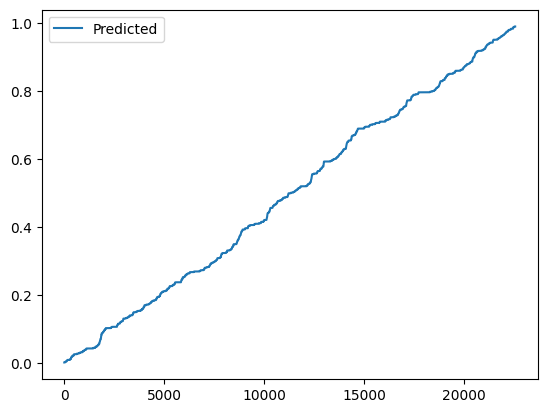

In [452]:
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

In [453]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [454]:
train_predictions

array([[  0.9393178],
       [  0.9412243],
       [  0.9412243],
       ...,
       [400.94528  ],
       [400.94528  ],
       [400.94528  ]], dtype=float32)

In [455]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 230.66562443233613
Test RMSE: 466.9456151019123


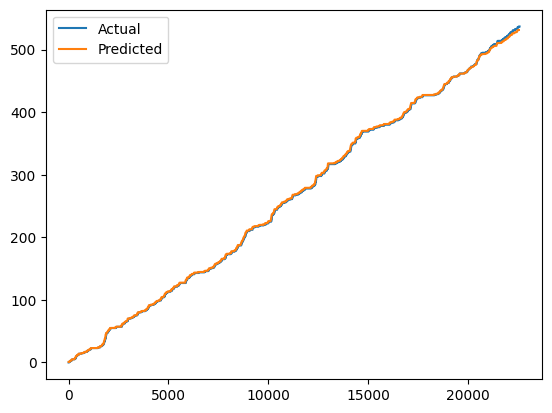

In [456]:
plt.plot(scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(np.concatenate([train_predictions, test_predictions]), label='Predicted')
plt.legend()
plt.show()

In [457]:
full_X = np.concatenate((X_train, X_test))
full_y = np.concatenate((y_train, y_test))

model.fit(full_X, full_y, epochs=50, batch_size=32)

Epoch 1/50
705/705 [==============================] - 29s 41ms/step - loss: 1.8562e-05
Epoch 2/50
705/705 [==============================] - 29s 40ms/step - loss: 1.4527e-06
Epoch 3/50
705/705 [==============================] - 29s 41ms/step - loss: 1.5686e-06
Epoch 4/50
705/705 [==============================] - 28s 40ms/step - loss: 3.1600e-06
Epoch 5/50
705/705 [==============================] - 28s 40ms/step - loss: 3.0542e-06
Epoch 6/50
705/705 [==============================] - 28s 40ms/step - loss: 3.1808e-06
Epoch 7/50
705/705 [==============================] - 28s 40ms/step - loss: 7.0691e-06
Epoch 8/50
705/705 [==============================] - 28s 40ms/step - loss: 3.0381e-06
Epoch 9/50
705/705 [==============================] - 30s 43ms/step - loss: 6.6482e-06
Epoch 10/50
705/705 [==============================] - 29s 41ms/step - loss: 1.3419e-06
Epoch 11/50
705/705 [==============================] - 28s 40ms/step - loss: 2.2797e-06
Epoch 12/50
705/705 [====================

In [458]:
forecast_steps = 3600

current_sequence = X_test[-1]

predicted_values = []

In [459]:
X_test[-1]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [460]:
look_back = 30

In [461]:
for i in range(forecast_steps):
    current_sequence_reshaped = np.reshape(current_sequence, (1, look_back, 1))
    
    next_value = model.predict(current_sequence_reshaped, verbose=0)
    
    predicted_values.append(next_value[0, 0])
    
    current_sequence = np.roll(current_sequence, -1)
    current_sequence[-1] = next_value

In [462]:
predicted_values = np.array(predicted_values).reshape(-1, 1)
predicted_values = scaler.inverse_transform(predicted_values)

In [463]:
predicted_values

array([[537.1689 ],
       [537.21136],
       [537.2673 ],
       ...,
       [560.3998 ],
       [560.3998 ],
       [560.3998 ]], dtype=float32)

In [470]:
print(f'Total Sixes in this ICC World Cup 2023 : {int(np.round(predicted_values)[-1])}')

Total Sixes in this ICC World Cup 2023 : 560


* The goal is to predict the number of sixes (a continuous numerical value) in the ICC World Cup 2023. The model is built using Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN), for time-series prediction or sequence modeling.

In [472]:
with open('six.pkl', 'wb') as file:
    pickle.dump(model, file)

In [474]:
with open('six_df.pkl', 'wb') as file:
    pickle.dump(full_X, file)